In [2]:
# 데이터 불러오기
import pandas as pd
train_df = pd.read_csv("./data/bike-sharing-demand/train.csv")
test_df = pd.read_csv("./data/bike-sharing-demand/test.csv")

In [3]:
print(train_df['temp'].describe())

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64


In [4]:
train_df['temp_bin'] = pd.qcut(train_df['temp'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])


In [5]:
result = train_df.groupby('temp_bin')['count'].agg(['sum', 'count']).reset_index()
result['mean'] = result['sum'] / result['count']
result

C:\Users\Admin\AppData\Local\Temp\ipykernel_2292\2622666730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_df.groupby('temp_bin')['count'].agg(['sum', 'count']).reset_index()


,temp_bin,sum,count,mean
0,Q1,301965,2926,103.200615
1,Q2,466337,2709,172.143595
2,Q3,564570,2609,216.393254
3,Q4,752604,2642,284.861469


In [6]:
bins = [0, 10, 20, 30, float('inf')]
labels = ['Cold', 'Cool', 'Warm', 'Hot']

In [7]:
train_df['temp_bin'] = pd.cut(train_df['temp'], bins=bins, labels=labels, right=False)

In [8]:
result = train_df.groupby('temp_bin')['count'].agg(['sum', 'count', 'mean']).reset_index()
print(result)

print(result)

  temp_bin     sum  count        mean
0     Cold   92141   1259   73.185862
1     Cool  609233   4049  150.465053
2     Warm  968265   4334  223.411398
3      Hot  415837   1244  334.274116
  temp_bin     sum  count        mean
0     Cold   92141   1259   73.185862
1     Cool  609233   4049  150.465053
2     Warm  968265   4334  223.411398
3      Hot  415837   1244  334.274116


C:\Users\Admin\AppData\Local\Temp\ipykernel_2292\3021409813.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = train_df.groupby('temp_bin')['count'].agg(['sum', 'count', 'mean']).reset_index()


In [9]:
print(train_df['humidity'].describe())

count    10886.000000
mean        61.886460
std         19.245033
min          0.000000
25%         47.000000
50%         62.000000
75%         77.000000
max        100.000000
Name: humidity, dtype: float64


In [10]:
bins = [0, 30, 60, 80, 100]
labels = ['Dry', 'Comfortable', 'Humid', 'Very Humid']

train_df['humidity_bin'] = pd.cut(train_df['humidity']
                                  , bins=bins, labels=labels, right=True)




In [11]:
train_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,temp_bin,humidity_bin
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Cold,Very Humid
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Cold,Humid
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Cold,Humid
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Cold,Humid
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Cold,Humid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Cool,Comfortable
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Cool,Comfortable
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Cool,Humid
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Cool,Humid


In [13]:
print(train_df['windspeed'].describe())

count    10886.000000
mean        12.799395
std          8.164537
min          0.000000
25%          7.001500
50%         12.998000
75%         16.997900
max         56.996900
Name: windspeed, dtype: float64


In [13]:
top10 = train_df.sort_values(by='count', ascending=False).head(10)
top10

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.060,44,16.9979,91,886,977
9320,2012-09-11 17:00:00,3,0,1,1,28.70,31.820,28,0.0000,168,802,970
9297,2012-09-10 18:00:00,3,0,1,1,25.42,31.060,35,19.9995,111,857,968
9752,2012-10-10 17:00:00,4,0,1,1,23.78,27.275,43,15.0013,91,857,948
9896,2012-10-16 17:00:00,4,0,1,1,21.32,25.000,39,12.9980,104,839,943
9344,2012-09-12 17:00:00,3,0,1,1,28.70,31.820,41,19.9995,114,811,925
9584,2012-10-03 17:00:00,4,0,1,1,28.70,32.575,65,0.0000,84,833,917
9608,2012-10-04 17:00:00,4,0,1,1,28.70,32.575,51,15.0013,112,789,901
9632,2012-10-05 17:00:00,4,0,1,1,28.70,31.820,42,11.0014,158,742,900
8984,2012-08-16 17:00:00,3,0,1,1,33.62,36.365,34,12.9980,130,767,897


In [11]:
train_df['workingday'].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

In [10]:
train_df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [9]:
train_df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [6]:
train_df.drop(columns = 'datetime').corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [14]:
X = train_df.drop(columns=['count','datetime','casual','registered'])
y = train_df['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, pred)
print("R2 score:", r2)

RMSE: 154.9285257225729
R2 score: 0.2623653851051515


     month  hour       count
0        1     0   23.027027
1        1     1   16.513514
2        1     2   13.000000
3        1     3    9.538462
4        1     4    3.235294
..     ...   ...         ...
283     12    19  264.710526
284     12    20  187.131579
285     12    21  146.473684
286     12    22  108.052632
287     12    23   76.868421

[288 rows x 3 columns]


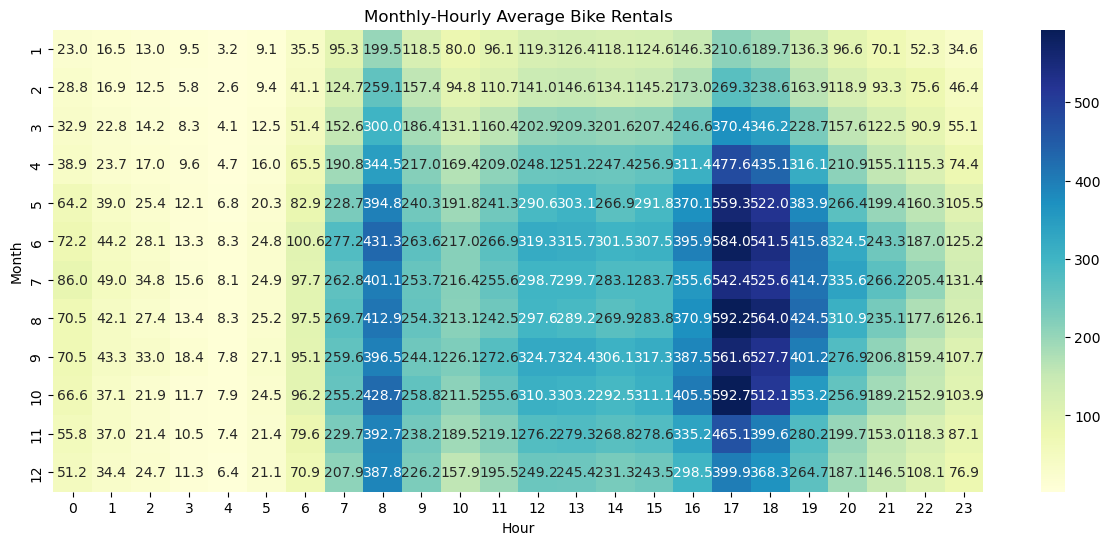

In [15]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['hour'] = train_df['datetime'].dt.hour

result = train_df.groupby(['month', 'hour'])['count'].mean().reset_index()
print(result)

pivot = train_df.pivot_table(index='month',
                       columns='hour',
                       values='count',
                       aggfunc='mean')
pivot

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Monthly-Hourly Average Bike Rentals')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.show()


✅ 히트맵에서 알 수 있는 점
1️⃣ 패턴

6월~9월(여름) 구간이 진한 파란색 → 평균 대여량 높음.

오전 79시, 오후 1719시 → 출근/퇴근 피크시간이 뚜렷함.

겨울(12월~2월)은 전반적으로 대여량이 낮음.

2️⃣ 시간대

새벽이른 아침 (05시): 대여량 거의 없음.

89시, 1719시: 출퇴근 시간대 대여량이 다른 시간대보다 높음.

낮 12~15시: 여름엔 추가 피크존이 있음 (레저/관광).

3️⃣ 월별

7~9월 가장 활발 → 날씨 좋고 휴가철.

1~2월, 12월은 가장 한산.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday  # 월=0, 일=6
df['is_weekend'] = df['weekday'].isin([5, 6]).astype(int)


출근(6~9시), 업무(10~16시), 퇴근(17~20시), 야간(21~5시) 같이 구간 나누는 것도 좋음.

In [ ]:
def time_slot(hour):
    if 6 <= hour <= 9:
        return 'morning_peak'
    elif 10 <= hour <= 16:
        return 'daytime'
    elif 17 <= hour <= 20:
        return 'evening_peak'
    else:
        return 'night'

df['time_slot'] = df['hour'].apply(time_slot)


In [ ]:
pivot = df.pivot_table(index='month',
                       columns='hour',
                       values='count',
                       aggfunc='mean').reset_index()
pivot.to_csv('monthly_hourly_avg.csv', index=False)
